## Problem 2
Deliverable: predict target (hourly web traffic) given 13 input features and provide an assessment of the most important features
Strategy: Perform exploratory data analysis to assess the distribution of the sampled data, and perform penalized regression through either elasticnet or ridge regression 

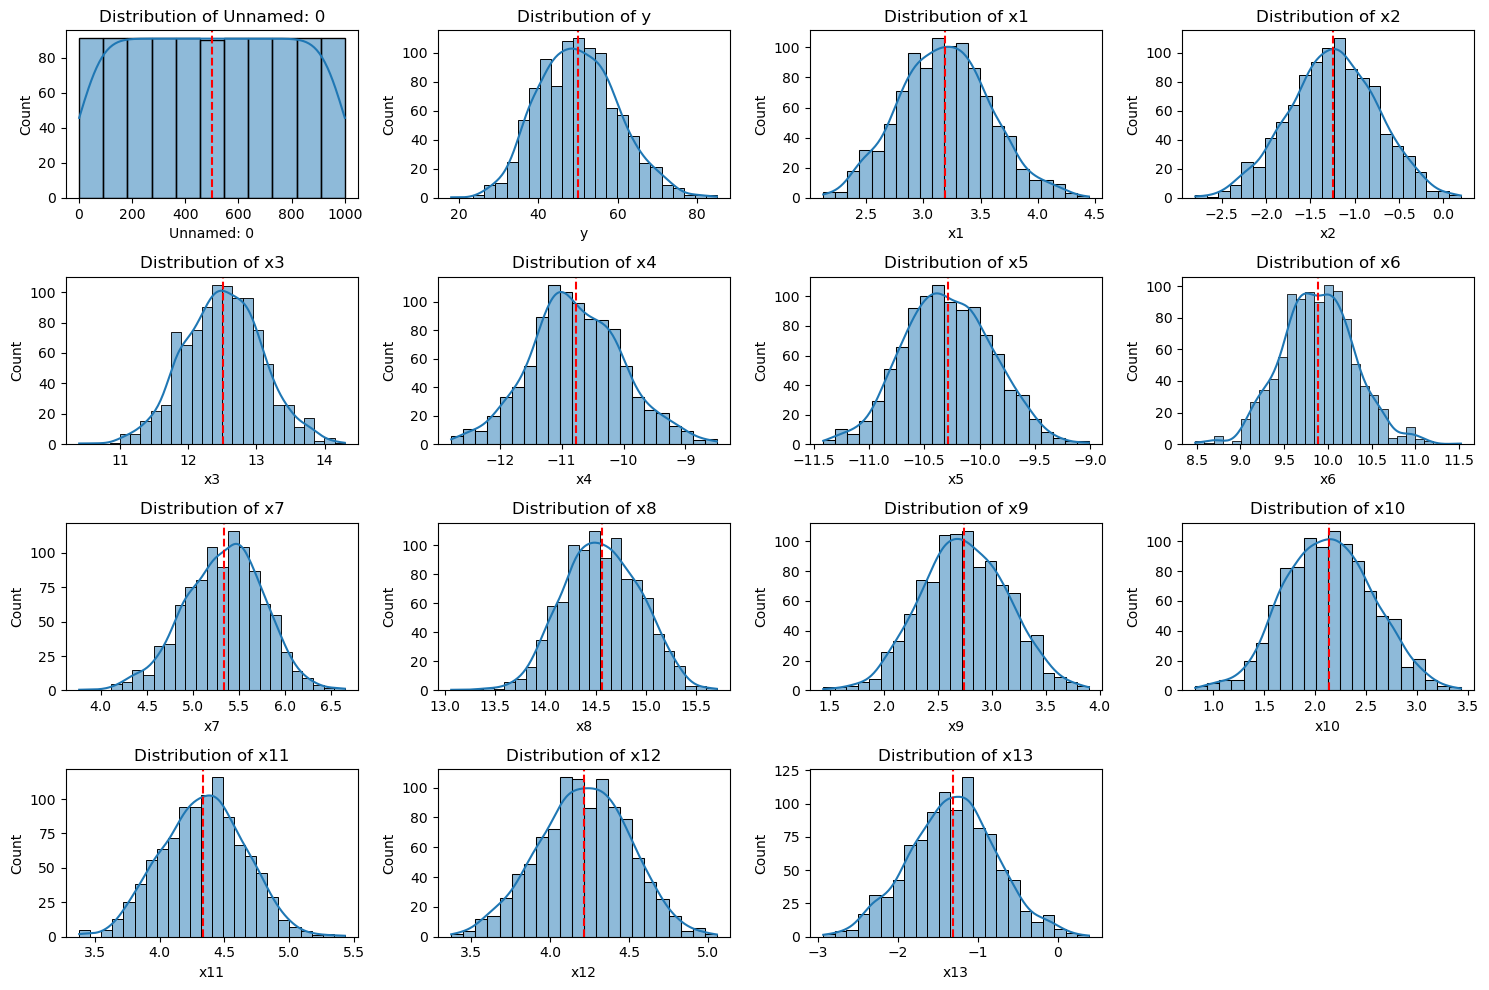

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./midterm_data/data_midterm_problem2.csv')

#
x = df.drop(['y', 'Unnamed: 0'], axis = 1)
y = df['y']
# 
#print(df.describe())
#print(df.isnull().sum())

# Plot the distribution of each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True)
    mean_value = df[column].mean()

    plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')

    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()



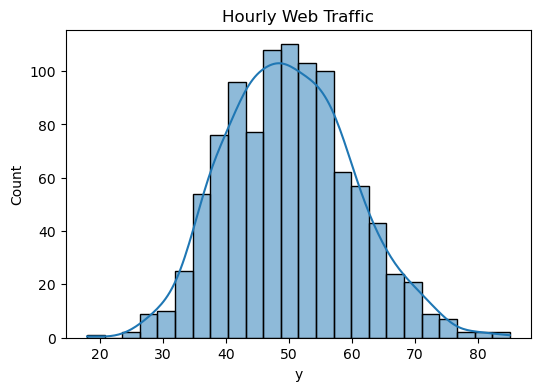

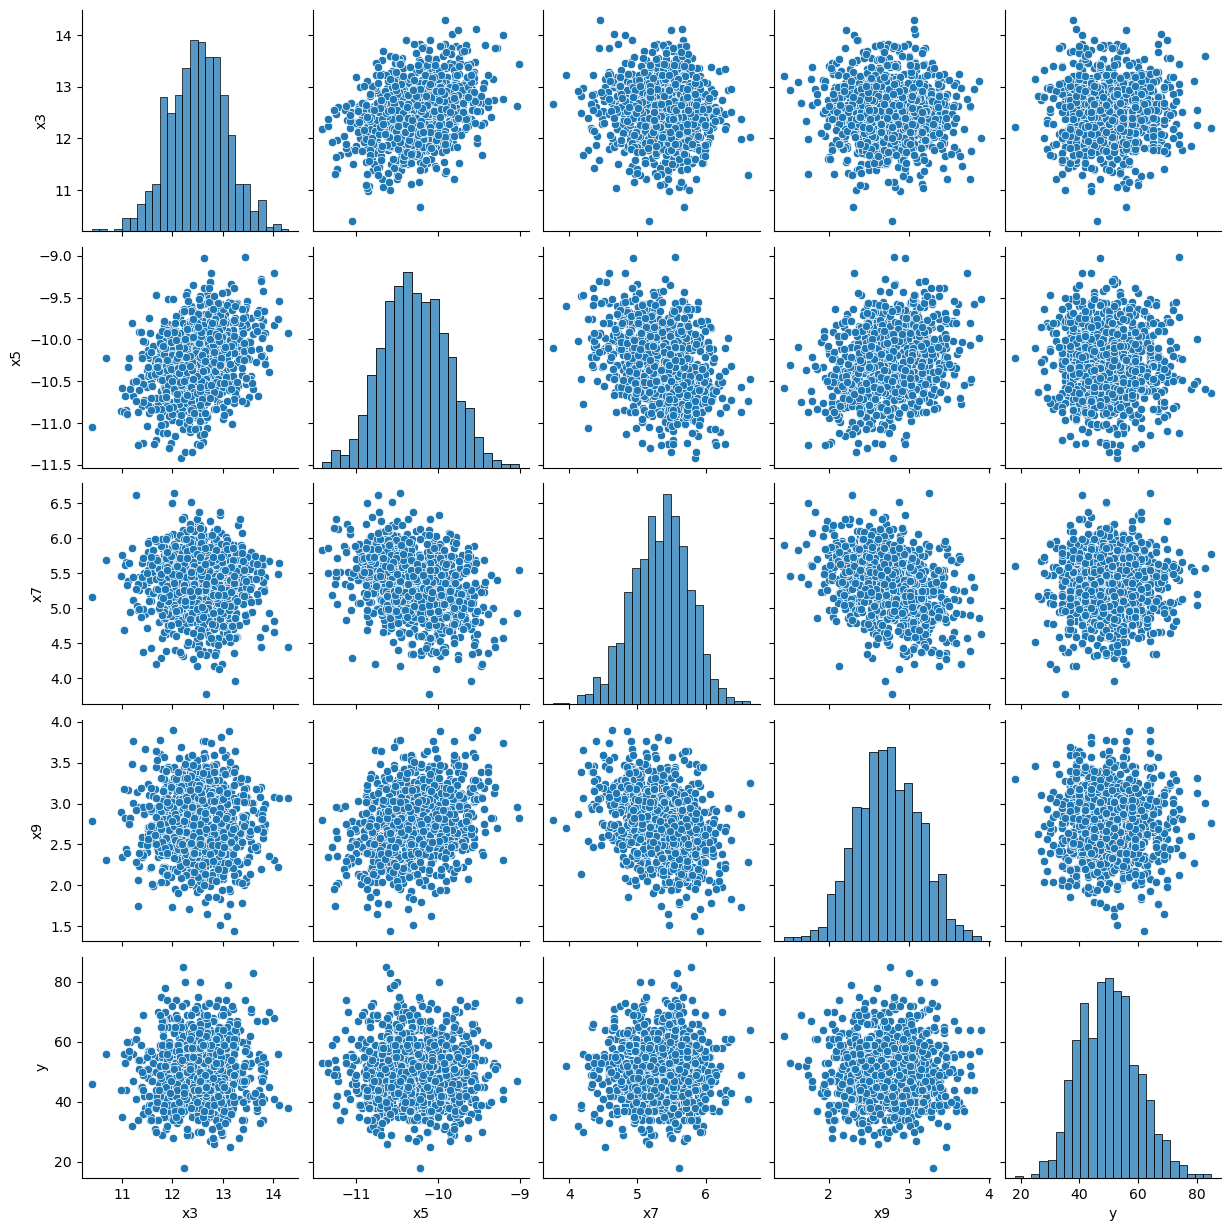

50.055 10.00220070879498


In [3]:
# CHECK DISTRIBUTION OF Y
plt.figure(figsize=(6, 4))
sns.histplot(df['y'], kde=True)
plt.title('Hourly Web Traffic')
plt.show()

# Pairplot to visualize relationships between X1, X2, and y
sns.pairplot(df[['x3', 'x5', 'x7', 'x9', 'y']])
plt.show()

meany = df['y'].mean()
sdy = df['y'].std()
print (meany, sdy)

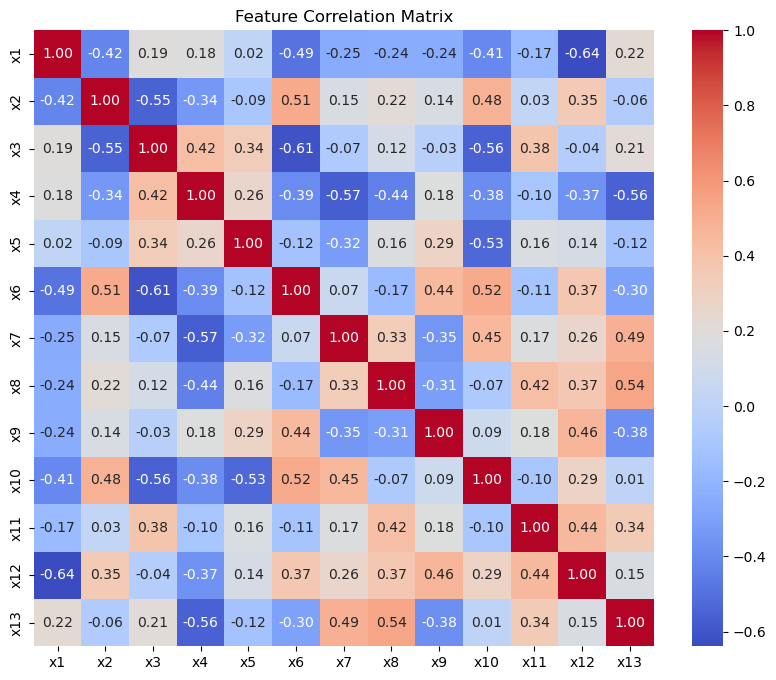

In [4]:
#correlation matrix
corr_matrix = x.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()


Notes after exploratory data analysis:
- the features are quite collinear
- y is normally distributed random variable

Best alpha: 100
Mean Squared Error with optimized alpha: 120.23011111110071


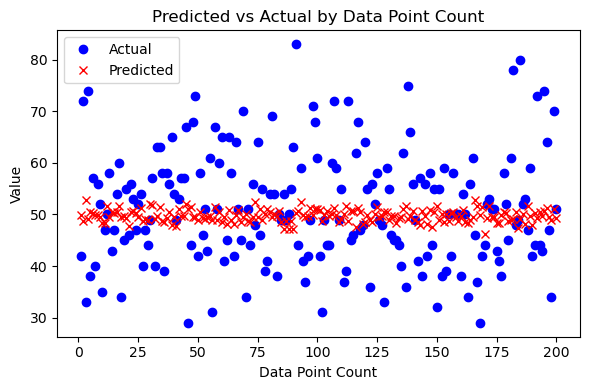

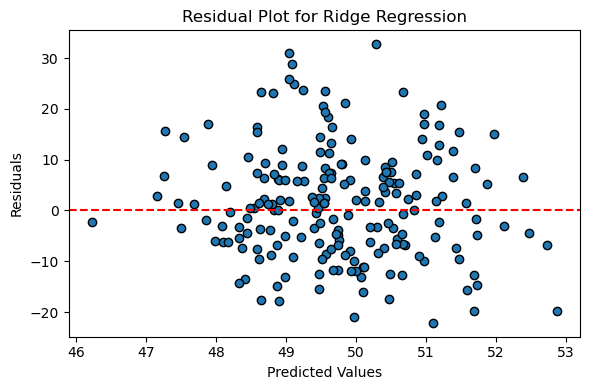

In [5]:
## let us start with ridge regression ## 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# split into training data, standardize features for ridge
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# init params and model
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
ridge_cv = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge_cv, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')
#
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)

# 
y_pred_best = ridge_best.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error with optimized alpha: {mse_best}')


## plotting
# index test data for plotting
index_test = range(1, len(y_test) + 1)

# plot predictions vs test vals
plt.figure(figsize=(6, 4))
plt.plot(index_test, y_test, label='Actual', color='blue', marker='o', linestyle='none')
plt.plot(index_test, y_pred_best, label='Predicted', color='red', marker='x', linestyle='none')
plt.xlabel('Data Point Count')
plt.ylabel('Value')
plt.title('Predicted vs Actual by Data Point Count')
plt.legend()
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_best
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_best, residuals, edgecolors=(0, 0, 0))
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Ridge Regression')
plt.tight_layout()
plt.show()


c:\Users\g7712_razer2\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\g7712_razer2\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29865.94587482303, tolerance: 5.973190000000001
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\g7712_razer2\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\g7712_razer2\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descen

Best alpha: 0.19306977288832497
Best l1_ratio: 0.0
Standard Deviation of Predictions (Elastic Net CV): 1.02983577009212
Standard Deviation of Actual Values: 10.819292952868961


c:\Users\g7712_razer2\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.741e+04, tolerance: 7.616e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


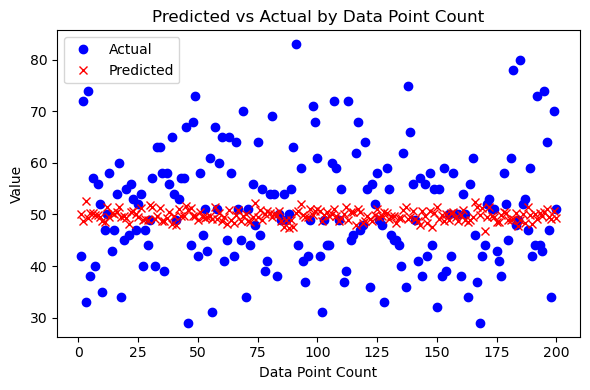

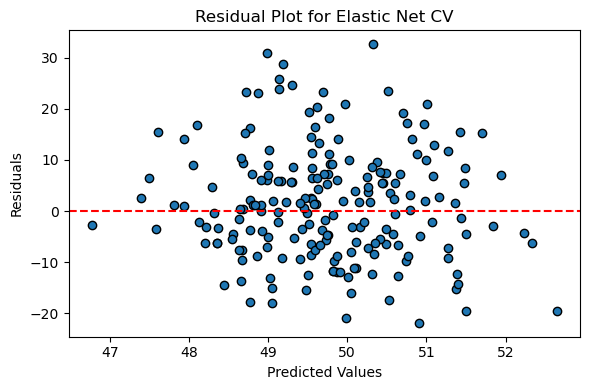

[-0.19193182  0.64168116  0.47882157  0.77683364 -0.58398815  0.32252254
  0.47314424 -0.42452926 -0.30466719 -0.72182452 -0.55933132  0.33682193
  0.17881662]


In [7]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler

# define elasticnet model
elastic_net_cv = ElasticNetCV(l1_ratio=np.linspace(0, 1, 10), 
                              alphas=np.logspace(-5, 5, 50),   
                              cv=5,                            
                              random_state=42)

# 
elastic_net_cv.fit(X_train_scaled, y_train)

# 
best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_
print(f'Best alpha: {best_alpha}')
print(f'Best l1_ratio: {best_l1_ratio}')

# 
y_pred_en_cv = elastic_net_cv.predict(X_test_scaled)
coefs = elastic_net_cv.coef_

# 
std_pred_en_cv = np.std(y_pred_en_cv)
std_actual = np.std(y_test)
print(f'Standard Deviation of Predictions (Elastic Net CV): {std_pred_en_cv}')
print(f'Standard Deviation of Actual Values: {std_actual}')

# plot predictions vs test vals
plt.figure(figsize=(6, 4))
plt.plot(index_test, y_test, label='Actual', color='blue', marker='o', linestyle='none')
plt.plot(index_test, y_pred_en_cv, label='Predicted', color='red', marker='x', linestyle='none')
plt.xlabel('Data Point Count')
plt.ylabel('Value')
plt.title('Predicted vs Actual by Data Point Count')
plt.legend()
plt.tight_layout()
plt.show()
# plot resids
residuals_en_cv = y_test - y_pred_en_cv
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_en_cv, residuals_en_cv, edgecolors=(0, 0, 0))
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Elastic Net CV')
plt.tight_layout()
plt.show()
print(coefs)

After fitting both elastic net and ridge, it appears that the elastic net model defaults to perform as primarily ridge (the L1/L2 ratio is 0 after cv). Furtrhermore, plotting the residuals of each of these models suggests they are each underfit. Currently, according to the beta values (coefs), the most important features for the prediction of web traffic are:

0.777, -0.722, and 0.642, corresponding to features x4, x10, and x2 respectively.

Moving forward - I will try fitting ridge regression with a much greater number of iterations and a wider param search. Again, it appears that with both elastic and ridge regression underfit the model and do not optimally capture the noise in the data. I will try a wider param search and then move on to a different model such as bayesian regression or boosting and see if the results change. 

Best alpha: 100.0
Mean Squared Error with optimized alpha: 120.23011111110071


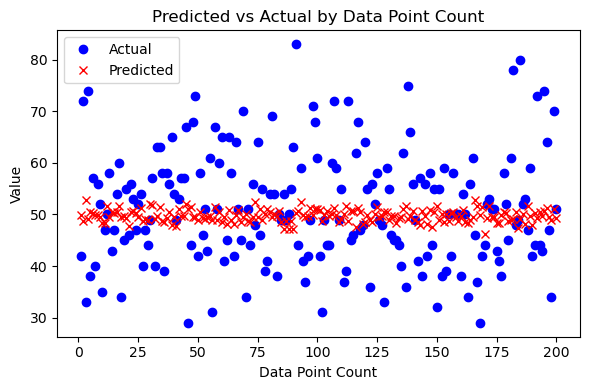

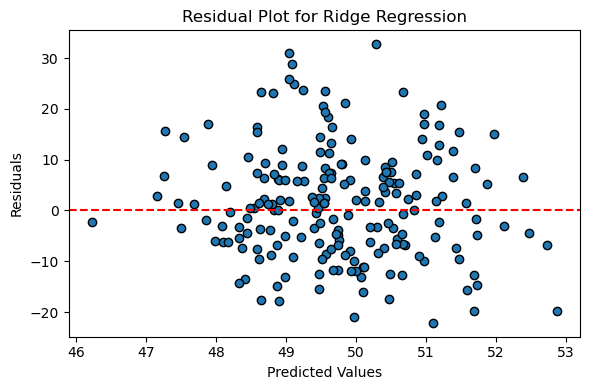

[-0.19193182  0.64168116  0.47882157  0.77683364 -0.58398815  0.32252254
  0.47314424 -0.42452926 -0.30466719 -0.72182452 -0.55933132  0.33682193
  0.17881662]


In [20]:
## let us RETURN to ridge regression ## 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# split and standardize for ridge
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# init params and model
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
# update paramgrid
param_grid = {'alpha': np.logspace(-4, 2, 50)} 
# increase max iter to attmept to redeem underfit
ridge_cv = Ridge(max_iter=100000)

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge_cv, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

#
ridge_1 = Ridge(alpha=best_alpha, max_iter=100000)
ridge_1.fit(X_train_scaled, y_train)

# 
y_pred_best = ridge_1.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error with optimized alpha: {mse_best}')


## plotting
# index test data for plotting
index_test = range(1, len(y_test) + 1)

# plot predictions vs test vals
plt.figure(figsize=(6, 4))
plt.plot(index_test, y_test, label='Actual', color='blue', marker='o', linestyle='none')
plt.plot(index_test, y_pred_best, label='Predicted', color='red', marker='x', linestyle='none')
plt.xlabel('Data Point Count')
plt.ylabel('Value')
plt.title('Predicted vs Actual by Data Point Count')
plt.legend()
plt.tight_layout()
plt.show()
# Calculate residuals
residuals = y_test - y_pred_best
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_best, residuals, edgecolors=(0, 0, 0))
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Ridge Regression')
plt.tight_layout()
plt.show()
print(coefs)

PLAYGROUND BELOW:

In [9]:
from sklearn.linear_model import BayesianRidge
import pandas as pd

# Fit Bayesian Ridge Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train_scaled, y_train)

# Get the coefficients and their standard deviations (uncertainty)
coefficients = bayesian_model.coef_
coef_std = bayesian_model.sigma_  # Standard deviation (uncertainty) of the coefficients

# Create a DataFrame to show feature importance and uncertainty
coef_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': coefficients, 'Uncertainty': coef_std.diagonal()})

# Sort by the absolute value of the coefficient to rank importance
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the sorted feature importance with uncertainty
print(coef_df_sorted)



   Feature  Coefficient  Uncertainty  Absolute Coefficient
3       x4     0.002177     0.000449              0.002177
10     x11    -0.001898     0.000449              0.001898
7       x8    -0.001734     0.000449              0.001734
4       x5    -0.001620     0.000449              0.001620
2       x3     0.000980     0.000449              0.000980
12     x13    -0.000962     0.000449              0.000962
8       x9    -0.000941     0.000449              0.000941
1       x2     0.000811     0.000449              0.000811
6       x7     0.000734     0.000449              0.000734
9      x10    -0.000705     0.000449              0.000705
0       x1    -0.000682     0.000449              0.000682
11     x12    -0.000426     0.000449              0.000426
5       x6     0.000017     0.000449              0.000017


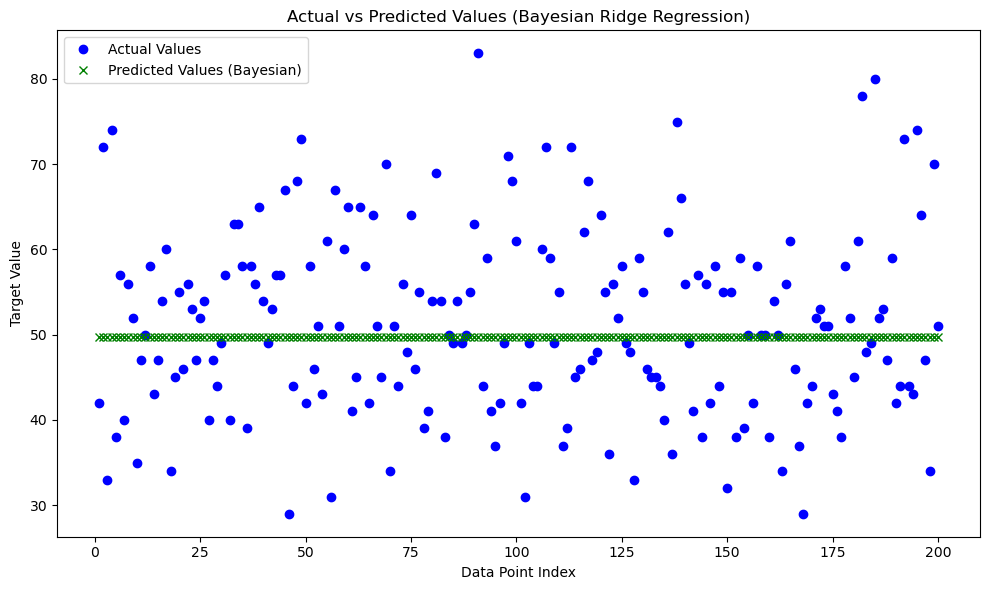

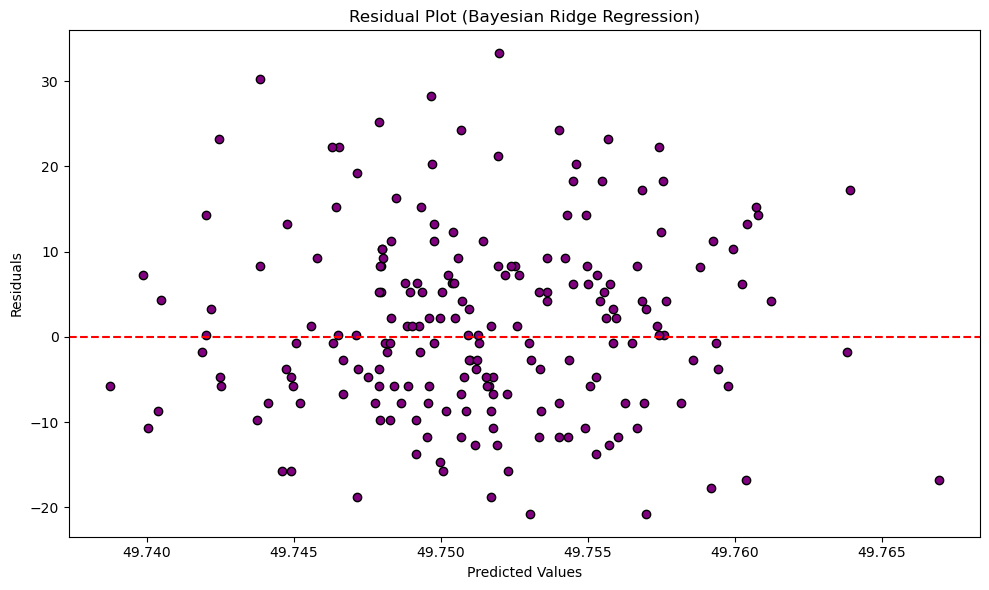

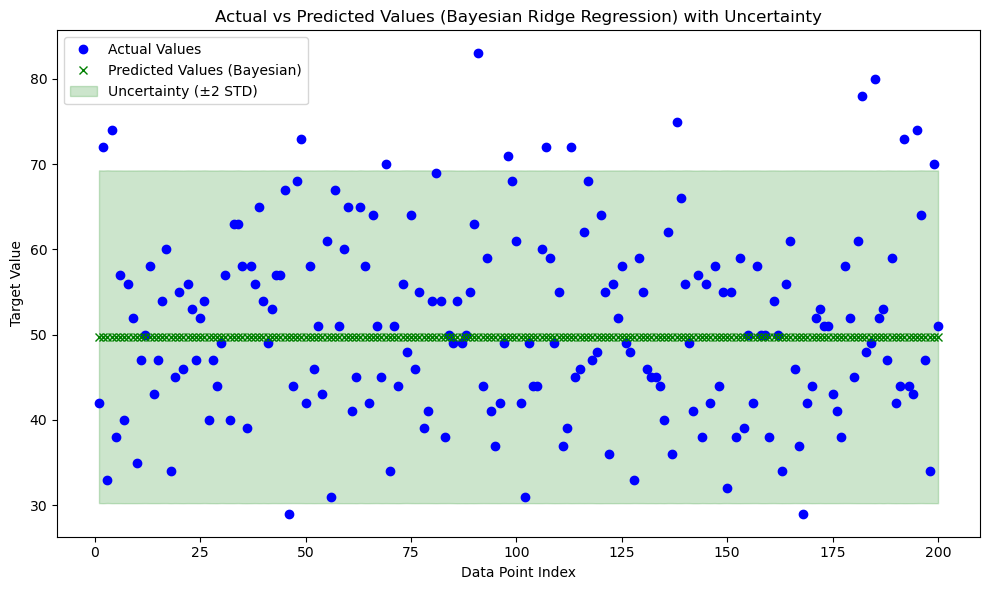

In [18]:
# Make predictions on the test set using Bayesian Ridge
y_pred_bayesian, y_std = bayesian_model.predict(X_test_scaled, return_std=True)

# Create an index based on the number of test samples
index_test = range(1, len(y_test) + 1)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(index_test, y_test, label='Actual Values', color='blue', marker='o', linestyle='none')
plt.plot(index_test, y_pred_bayesian, label='Predicted Values (Bayesian)', color='green', marker='x', linestyle='none')
plt.xlabel('Data Point Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Values (Bayesian Ridge Regression)')
plt.legend()
plt.tight_layout()
plt.show()
# Calculate residuals
residuals_bayesian = y_test - y_pred_bayesian

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_bayesian, residuals_bayesian, color='purple', edgecolor='k')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Bayesian Ridge Regression)')
plt.tight_layout()
plt.show()

# Plot actual vs predicted values with uncertainty
plt.figure(figsize=(10, 6))
plt.plot(index_test, y_test, label='Actual Values', color='blue', marker='o', linestyle='none')
plt.plot(index_test, y_pred_bayesian, label='Predicted Values (Bayesian)', color='green', marker='x', linestyle='none')

# Add uncertainty bounds (mean ± 2 * std)
plt.fill_between(index_test, y_pred_bayesian - 2 * y_std, y_pred_bayesian + 2 * y_std, color='green', alpha=0.2, label='Uncertainty (±2 STD)')

plt.xlabel('Data Point Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Values (Bayesian Ridge Regression) with Uncertainty')
plt.legend()
plt.tight_layout()
plt.show()



In [15]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the Lasso model
lasso = Lasso()

# Use GridSearchCV to find the best alpha (regularization strength)
param_grid = {'alpha': np.logspace(-4, 1, 50)}  # Range of alpha values to test
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

# Fit the Lasso model with the best alpha
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_scaled, y_train)
import pandas as pd

# Get the coefficients of the Lasso model
coefficients = lasso_best.coef_

# Create a DataFrame to display feature names and their coefficients
coef_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': coefficients})

# Sort by absolute value of the coefficients to show the most influential features
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the sorted coefficients
print(coef_df_sorted)


Best alpha: 0.9540954763499944
   Feature  Coefficient  Absolute Coefficient
0       x1         -0.0                   0.0
1       x2          0.0                   0.0
2       x3          0.0                   0.0
3       x4          0.0                   0.0
4       x5         -0.0                   0.0
5       x6          0.0                   0.0
6       x7          0.0                   0.0
7       x8         -0.0                   0.0
8       x9         -0.0                   0.0
9      x10         -0.0                   0.0
10     x11         -0.0                   0.0
11     x12         -0.0                   0.0
12     x13         -0.0                   0.0


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Define a parameter grid to optimize the hyperparameters
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate to control the contribution of each tree
    'max_depth': [3, 4, 5],  # Depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples at a leaf node
}

# Use GridSearchCV to find the best hyperparameters
grid_search_gbr = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_gbr.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_gbr = grid_search_gbr.best_params_
print(f'Best Hyperparameters: {best_params_gbr}')
# Initialize the best model with the optimal hyperparameters
gbr_best = GradientBoostingRegressor(**best_params_gbr, random_state=42)

# Fit the model to the training data
gbr_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_best.predict(X_test_scaled)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Mean Squared Error (GBR): {mse_gbr}')
print(f'R^2 Score (GBR): {r2_gbr}')

# Extract feature importances
feature_importances = gbr_best.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort by importance
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Display sorted feature importances
print(importance_df_sorted)



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (GBR): 122.65945256561234
R^2 Score (GBR): -0.04785999794640694
   Feature  Importance
10     x11    0.182604
2       x3    0.126918
0       x1    0.122914
6       x7    0.106325
3       x4    0.094602
5       x6    0.082667
12     x13    0.068732
8       x9    0.046654
11     x12    0.045519
7       x8    0.042286
4       x5    0.041773
9      x10    0.028996
1       x2    0.010011


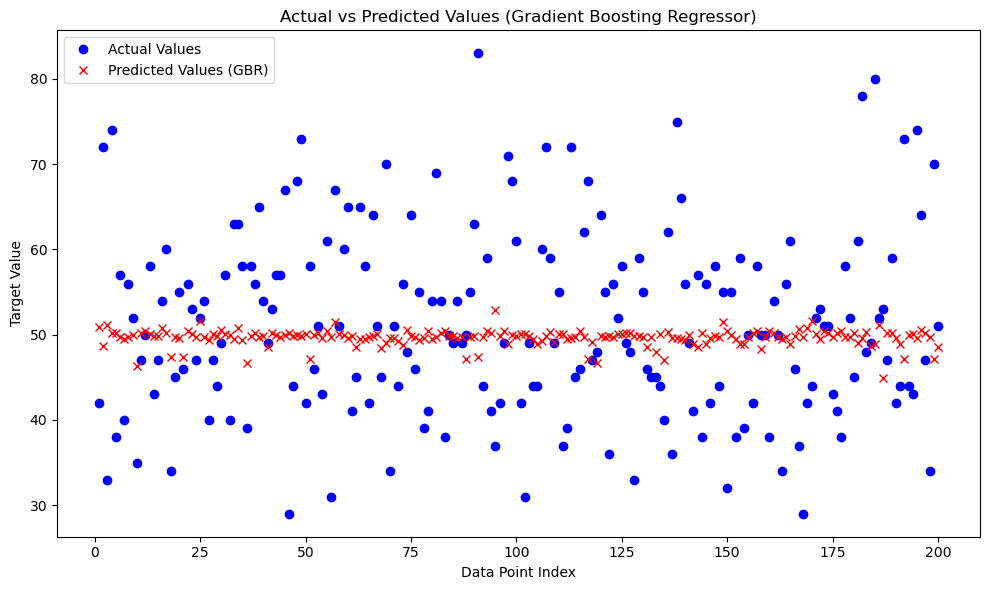

In [17]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_gbr = gbr_best.predict(X_test_scaled)

# Create an index based on the number of test samples
index_test = range(1, len(y_test) + 1)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(index_test, y_test, label='Actual Values', color='blue', marker='o', linestyle='none')
plt.plot(index_test, y_pred_gbr, label='Predicted Values (GBR)', color='red', marker='x', linestyle='none')
plt.xlabel('Data Point Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Values (Gradient Boosting Regressor)')
plt.legend()
plt.tight_layout()
plt.show()
